### DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

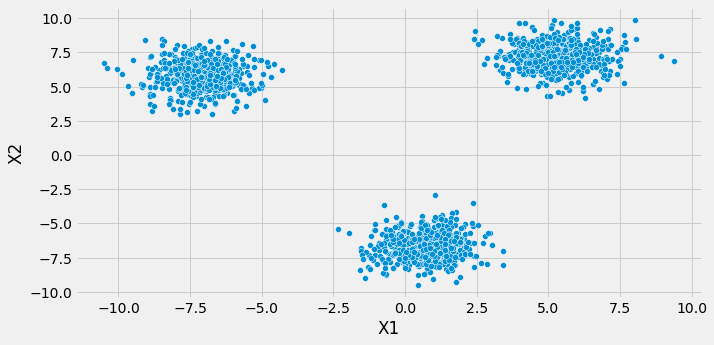

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

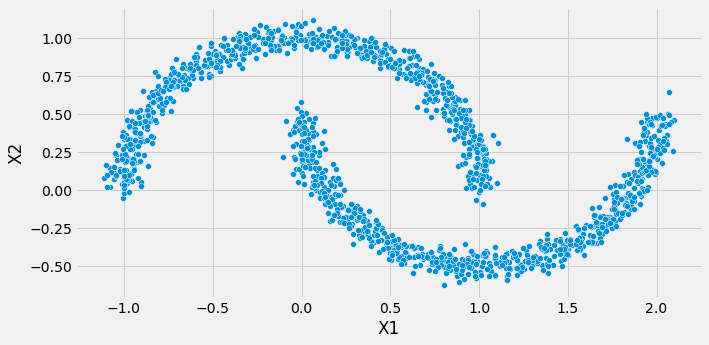

In [7]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [8]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

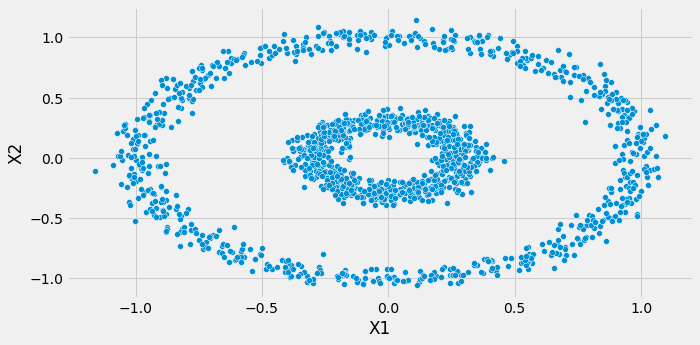

In [10]:
sns.scatterplot(data=circles,x='X1',y='X2')

### Label Discovery

In [11]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

### Kmeans Results

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

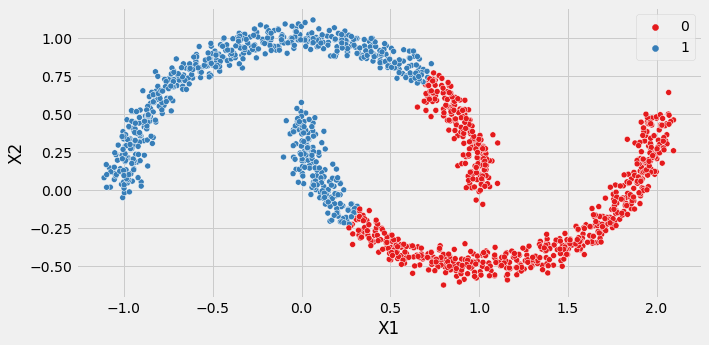

In [13]:
display_categories(model,moons)

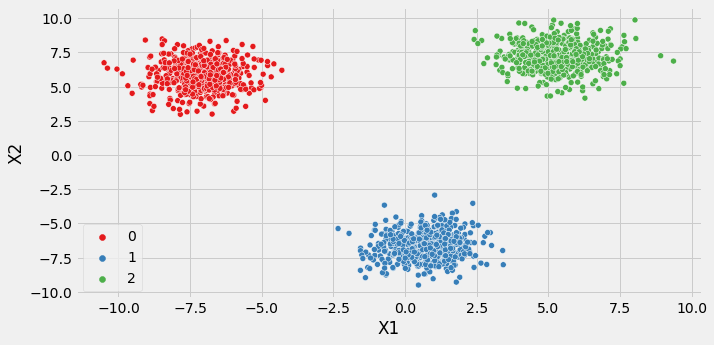

In [14]:
model = KMeans(n_clusters = 3)
display_categories(model,blobs)

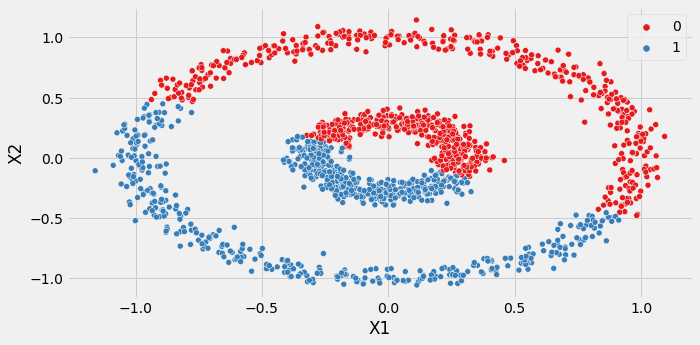

In [15]:
model = KMeans(n_clusters = 2)
display_categories(model,circles)

### DBSCAN Results

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
model = DBSCAN(eps=0.6)

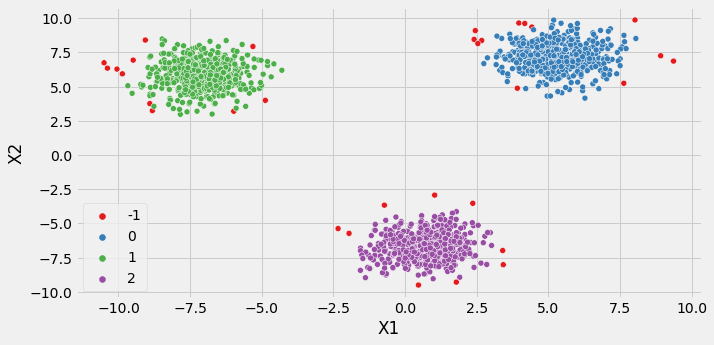

In [18]:
display_categories(model,blobs)

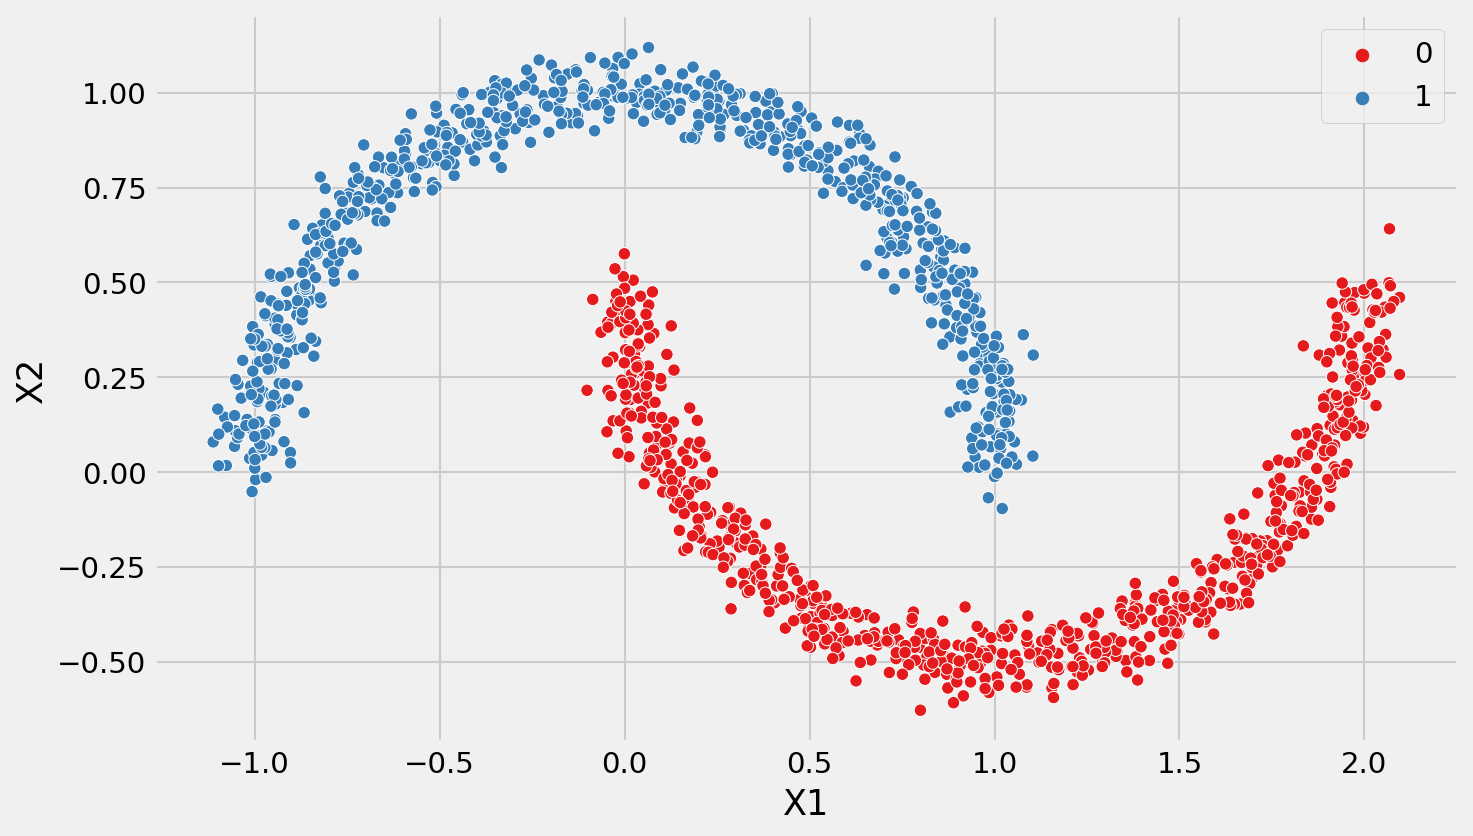

In [19]:
model = DBSCAN(eps=0.15)
plt.figure(figsize=(10,6),dpi=150)
display_categories(model,moons)

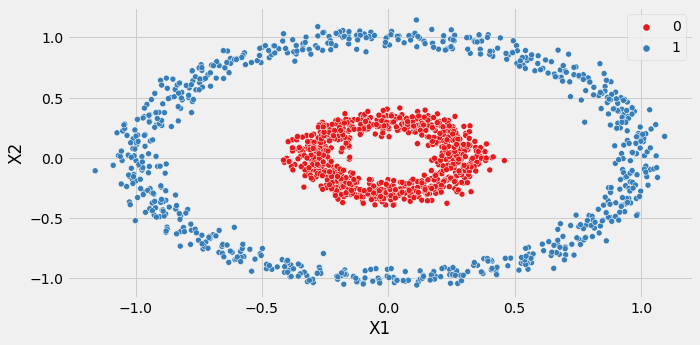

In [20]:
display_categories(model,circles)

Let's further explore DBSCAN Hyperparameters!

### DBSCAN Hyperparameters

In [21]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

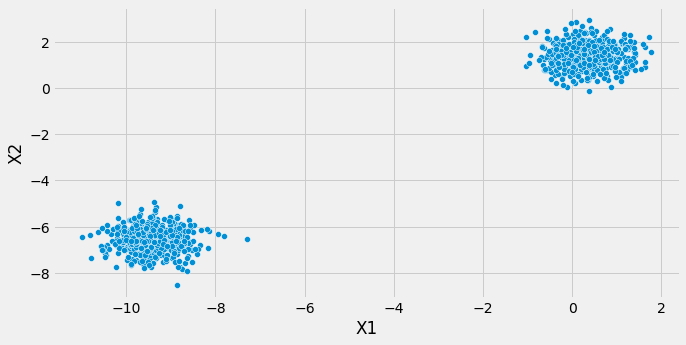

In [22]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

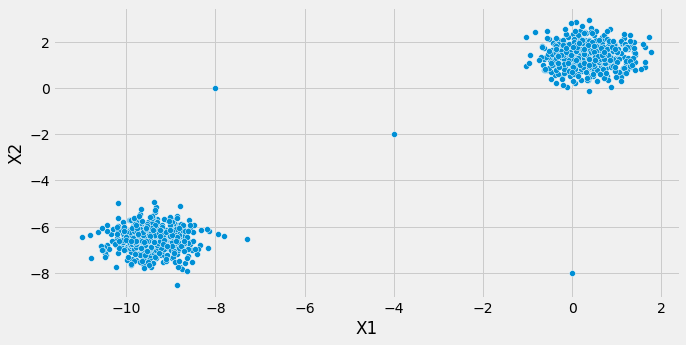

In [23]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [24]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [25]:
from sklearn.cluster import DBSCAN

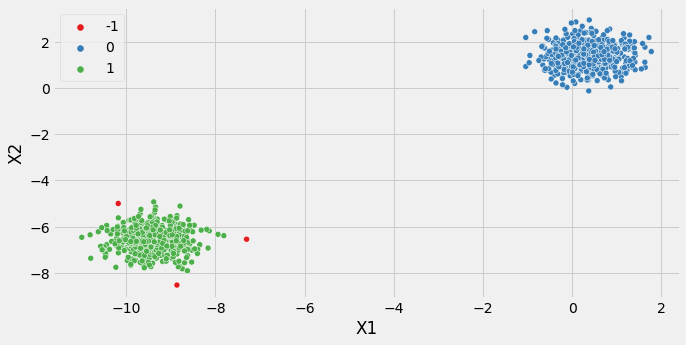

In [26]:
dbscan = DBSCAN()
display_categories(dbscan,two_blobs)

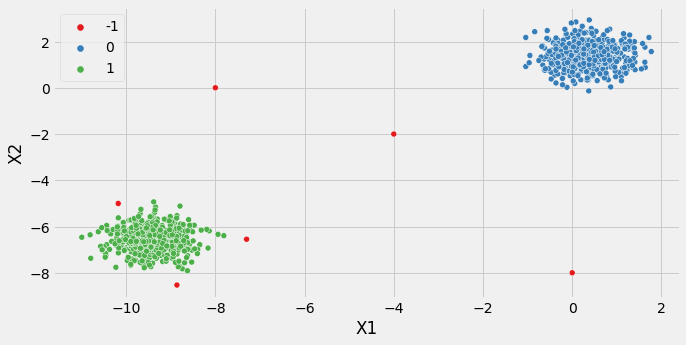

In [27]:
display_categories(dbscan,two_blobs_outliers)

### Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

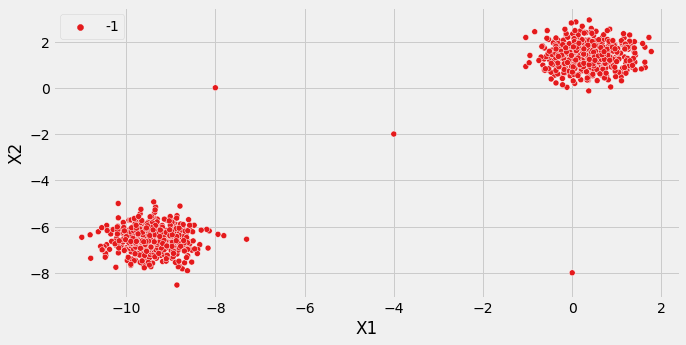

In [28]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

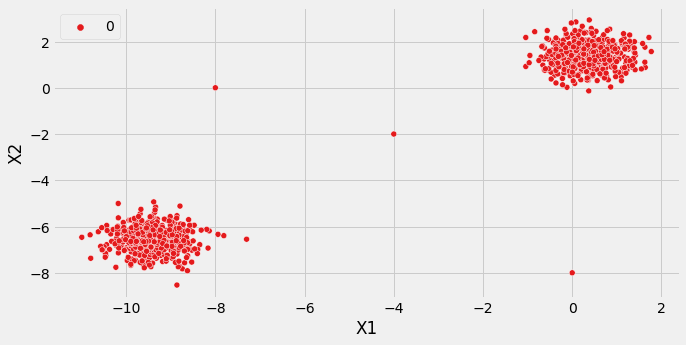

In [29]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

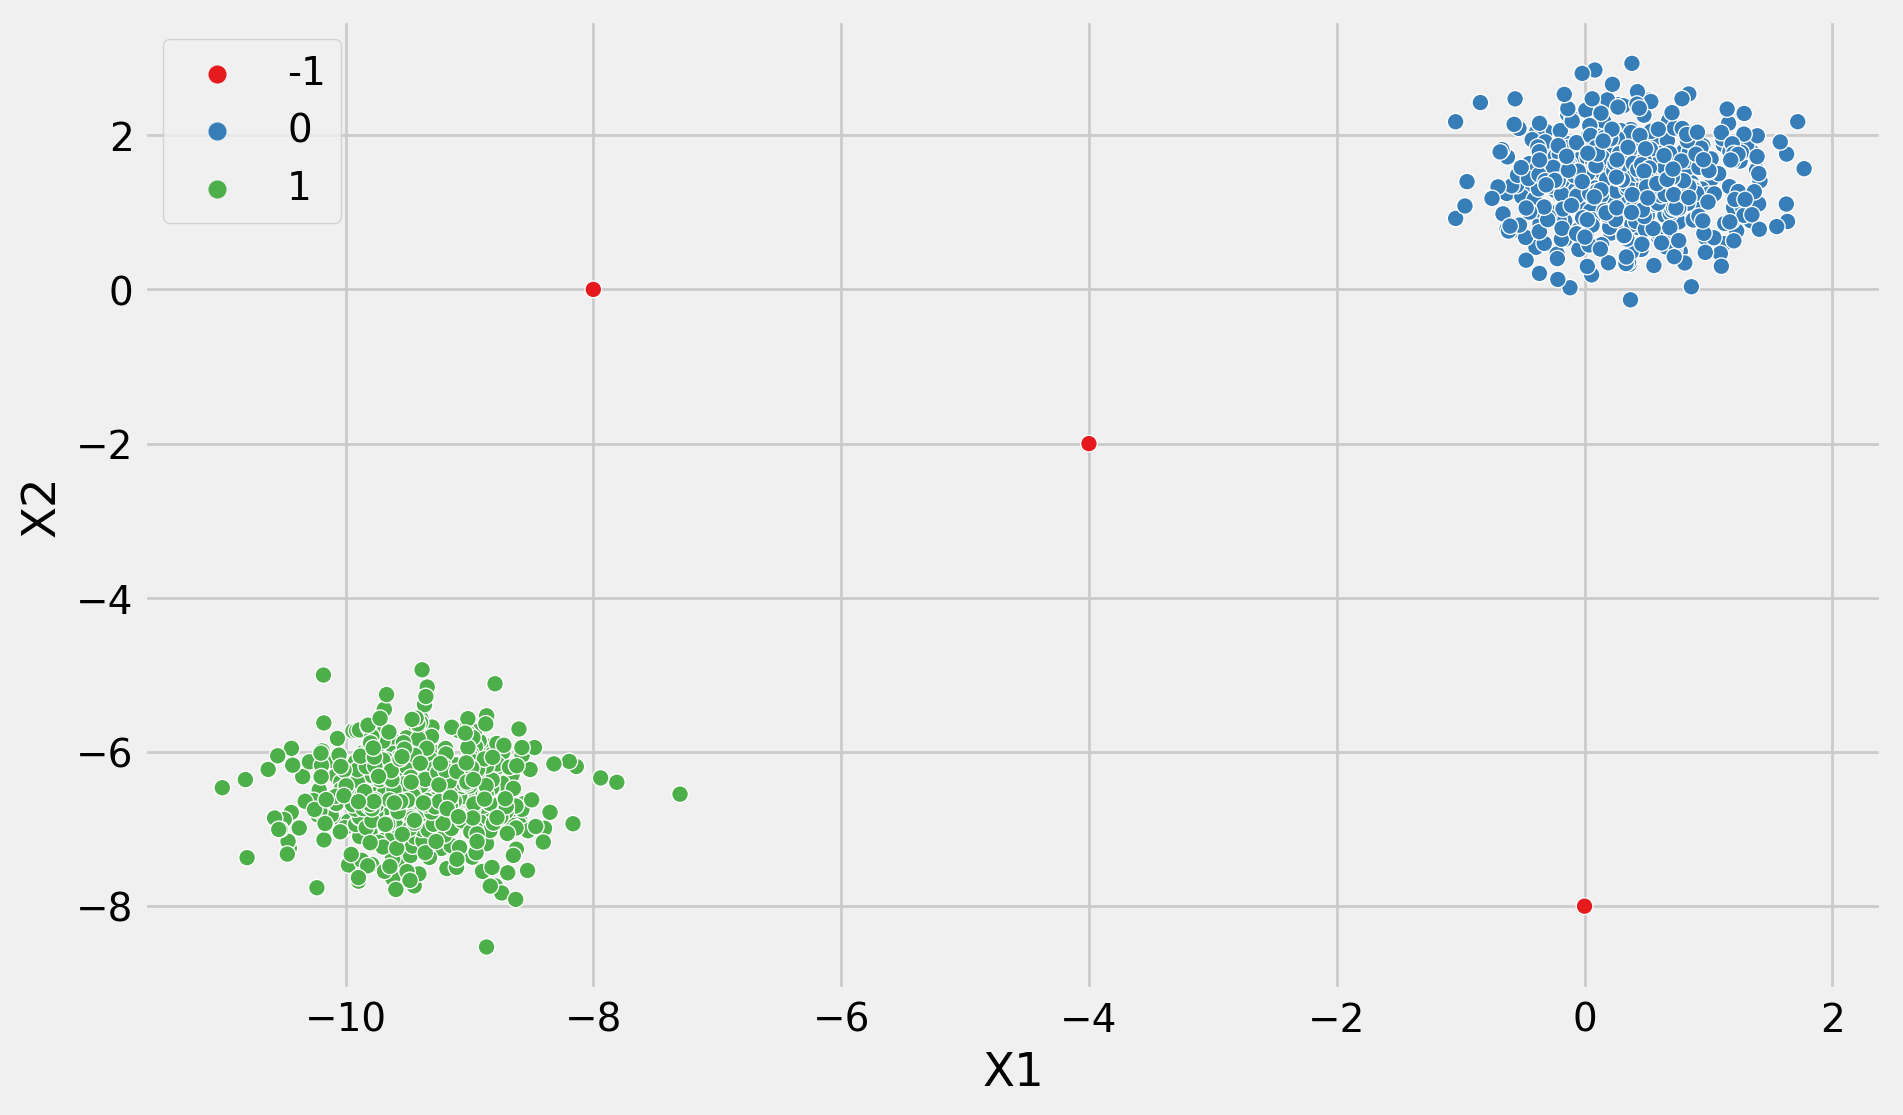

In [30]:
# How to find a good epsilon?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [31]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [32]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [33]:
np.sum(dbscan.labels_ == -1)

3

In [34]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

### Charting reasonable Epsilon values

In [35]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

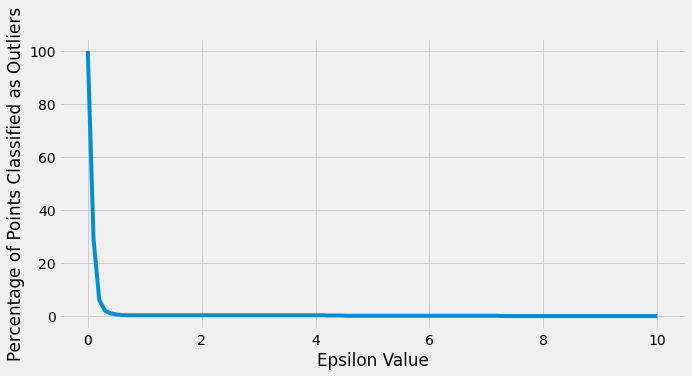

In [36]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

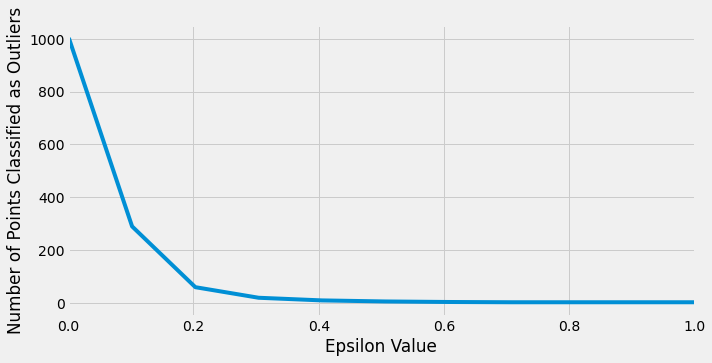

In [37]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?

If so, we could "target" a percentage, like choose a range producing 1%-5% as outliers.

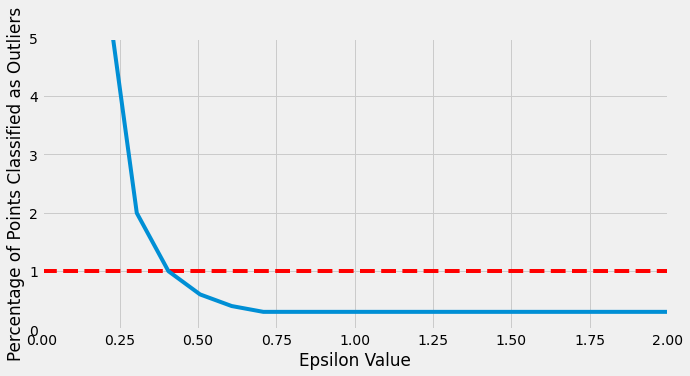

In [38]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

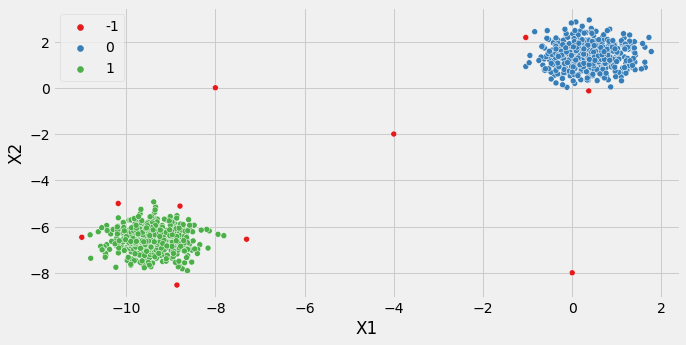

In [39]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, we could "target" a number of outliers, such as 3 points as outliers.

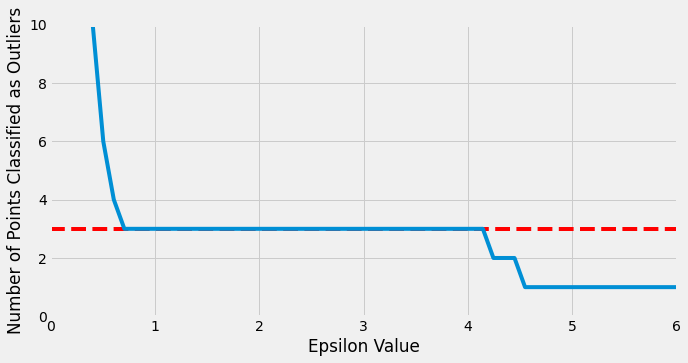

In [40]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

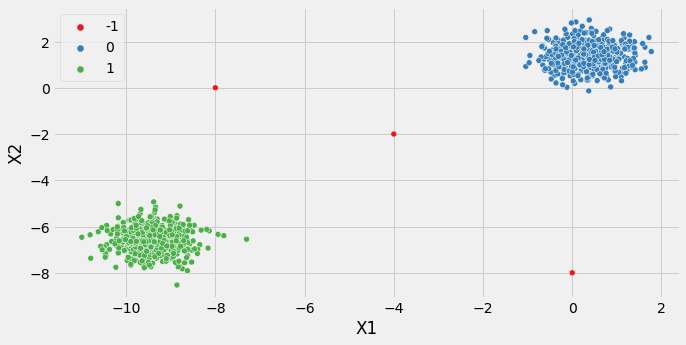

In [41]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [42]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

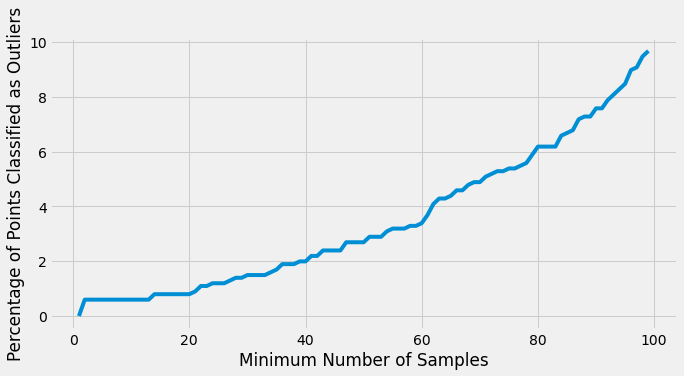

In [43]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

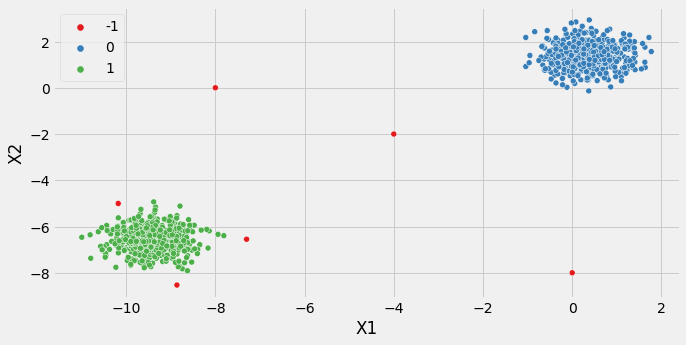

In [44]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

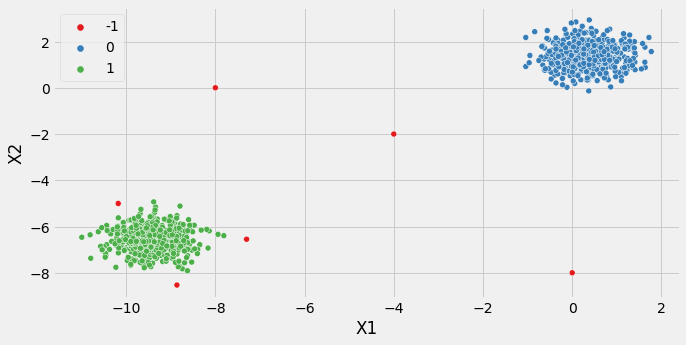

In [45]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

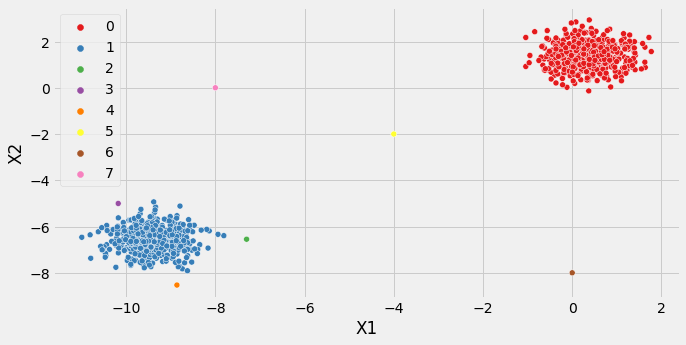

In [48]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

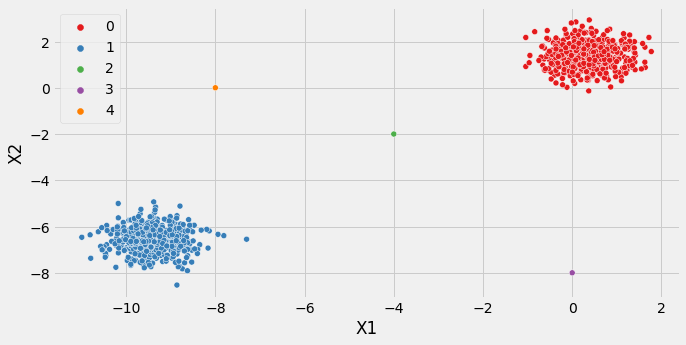

In [49]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)